# Flipkart project

In [1]:
#Importing necessart libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [2]:
# Importing and printing dataset
df = pd.read_csv("Customer_support_data.csv")
df1=df
df.head(10)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
5,1cfde5b9-6112-44fc-8f3b-892196137a62,Email,Returns,Fraudulent User,NaN,a2938961-2833-45f1-83d6-678d9555c603,NaN,01/08/2023 15:13,01/08/2023 18:39,01-Aug-23,NaN,NaN,NaN,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,5
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,Outcall,Product Queries,Product Specific Information,NaN,bfcb562b-9a2f-4cca-aa79-fd4e2952f901,NaN,01/08/2023 15:31,01/08/2023 23:52,01-Aug-23,NaN,NaN,NaN,NaN,Shannon Hicks,Aiden Patel,Olivia Tan,>90,Morning,5
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,Inbound,Shopzilla Related,General Enquiry,NaN,c7caa804-2525-499e-b202-4c781cb68974,NaN,01/08/2023 23:31,01/08/2023 23:36,01-Aug-23,NaN,NaN,NaN,NaN,Tabitha Ayala,Amelia Tanaka,Michael Lee,31-60,Evening,5


In [3]:
df.tail(10)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
85897,6a8afd66-6079-44d5-82c4-3abebc6c95cd,Inbound,Order Related,Invoice request,NaN,21f7b394-9fff-456f-b508-90be053b425c,NaN,31/08/2023 10:42,31/08/2023 10:47,31-Aug-23,NaN,NaN,NaN,NaN,John Carrillo,Brayden Wong,John Smith,61-90,Morning,5
85898,cedfd004-8d66-41f3-b506-2b11c60e7c62,Inbound,Returns,Reverse Pickup Enquiry,NaN,2aee3a77-ba29-44b9-a403-a2bb25e1d995,NaN,31/08/2023 18:12,31/08/2023 18:15,31-Aug-23,NaN,NaN,NaN,NaN,Samuel Douglas,Abigail Suzuki,Jennifer Nguyen,On Job Training,Morning,5
85899,7e1e70e6-0b3b-4af1-a953-5ac0c4123b89,Inbound,Returns,Return request,NaN,445f6875-cea9-40ca-ac94-67c065a04120,NaN,31/08/2023 23:34,31/08/2023 23:36,31-Aug-23,NaN,NaN,NaN,NaN,Stephanie Stewart,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5
85900,9ecbd0e0-dff3-475d-aca2-297144229e9c,Inbound,Order Related,Delayed,NaN,1b033755-0b17-4f3b-901c-f173c03c95e2,14/08/2023 18:43,31/08/2023 11:42,31/08/2023 11:45,31-Aug-23,BHUPALAPALLI,Books & General merchandise,193.0,NaN,Diana White,Layla Taniguchi,Emily Chen,>90,Morning,5
85901,2f4c7a58-c23b-4933-b65e-b6dbbb368b49,Inbound,Order Related,Order status enquiry,NaN,0cf9615a-60e7-4696-b679-a5602634fb29,28/08/2023 18:48,29/08/2023 19:13,31/08/2023 15:11,31-Aug-23,IBRAHIMPATNAM,Mobile,23999.0,NaN,William Hall,Isabella Wong,John Smith,>90,Morning,5
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4
85906,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,NaN,3230db30-f8da-4c44-8636-ec76d1d3d4f3,NaN,31/08/2023 23:36,31/08/2023 23:37,31-Aug-23,NaN,NaN,NaN,NaN,Elizabeth Guerra,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5


In [4]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [5]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28756 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [7]:
print('Number Of Instance:', df.shape[0])
print('Number of Attributes:', df.shape[1])
print('Number of Unique values:', df.nunique())
print("Number of Null Values:", df.isnull().sum())
print("Number Of Predicted Values:", df['CSAT Score'].value_counts())

Number Of Instance: 85907
Number of Attributes: 20
Number of Unique values: Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18232
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64
Number of Null Values: Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57151
Order_id                   18232
order_date_time            686

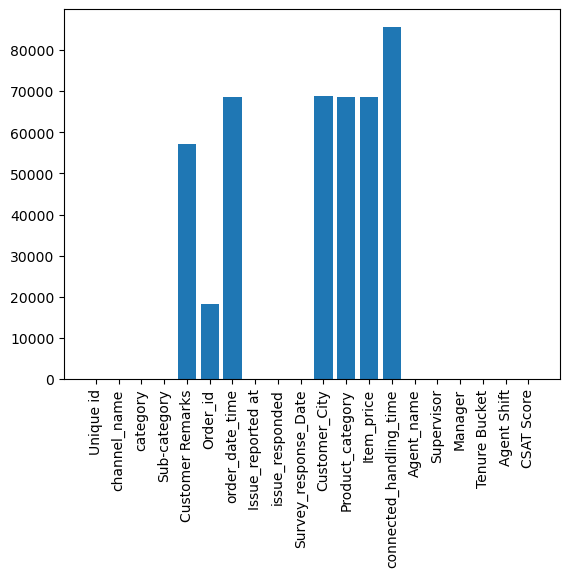

In [8]:
#nan value plotting
plt.bar(df.columns,df.isna().sum())
plt.xticks(rotation=90)
plt.show()

In [9]:
# Removing the columns which have more null values
df =df.drop(['connected_handling_time','Item_price', 'Product_category', 'Customer_City', 'order_date_time','Order_id','Customer Remarks'], axis=1)

In [10]:
df.isna().sum()

Unique id               0
channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

In [11]:
# Converting String to intiger
dec ={}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    dec[col]= le

In [12]:
# Find the x and y
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

In [13]:
# find the f_and p_values to understand the relationship between columns and Target Columns
f_val, p_val = f_regression(X, y)

In [14]:
pd.Series(f_val, index=X.columns)

Unique id                 1.515750
channel_name             68.091352
category                516.652476
Sub-category             50.576615
Issue_reported at        91.734609
issue_responded          85.804405
Survey_response_Date     86.022535
Agent_name                0.430711
Supervisor                0.017209
Manager                 120.998778
Tenure Bucket            80.557250
Agent Shift               0.970312
dtype: float64

In [15]:
pd.Series(p_val, index = X.columns)

Unique id                2.182671e-01
channel_name             1.582754e-16
category                4.922276e-114
Sub-category             1.154921e-12
Issue_reported at        1.016256e-21
issue_responded          2.030431e-20
Survey_response_Date     1.818572e-20
Agent_name               5.116420e-01
Supervisor               8.956300e-01
Manager                  3.992750e-28
Tenure Bucket            2.879182e-19
Agent Shift              3.246053e-01
dtype: float64

In [16]:
# Droping the Columns which shows low relation
X = X.drop(['Unique id', 'Agent_name','Supervisor', 'Agent Shift'], axis=1)
X

,channel_name,category,Sub-category,Issue_reported at,issue_responded,Survey_response_Date,Manager,Tenure Bucket
0,2,8,19,276,306,0,1,4
1,2,8,34,368,367,0,3,3
2,1,5,15,771,782,0,5,4
3,1,10,40,810,816,0,2,3
4,1,1,22,236,240,0,3,0
...,...,...,...,...,...,...,...,...
85902,1,9,36,29805,29386,30,5,4
85903,1,5,42,30102,29420,30,0,3
85904,1,5,25,30680,30005,30,4,4
85905,1,2,50,30737,30061,30,4,3


In [17]:
# Splitting datas to test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training and Testing
## Method1
### Logistic Regression

In [18]:
reg = LogisticRegression(random_state=42)
reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [19]:
reg.predict(x_test[0:5])

array([5, 5, 5, 5, 5], dtype=int64)

In [20]:
y_test[0:5]

24133    5
66747    1
46862    5
49218    5
24830    5
Name: CSAT Score, dtype: int64

In [21]:
y_pred = reg.predict(x_test)
accuracy_score(y_pred, y_test)

0.6941760757381756

<Axes: >

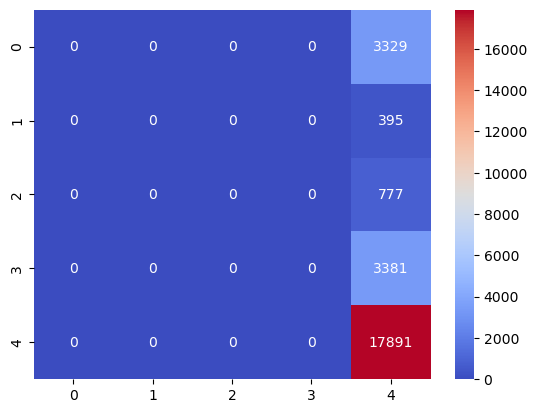

In [22]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, reg.predict(x_test)), annot=True, fmt=".0f", cmap="coolwarm")

#### By usint the Logistic regression got almost 70% of accuracy 

## Method 2
### DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
model.predict(x_test[1:5])

array([4, 1, 4, 5], dtype=int64)

In [24]:
y_test[1:5]

66747    1
46862    5
49218    5
24830    5
Name: CSAT Score, dtype: int64

In [25]:
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.5269080045008342

<Axes: >

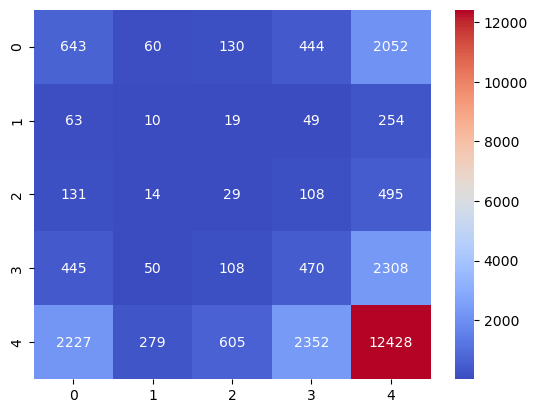

In [26]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt=".0f", cmap="coolwarm")

#### By using Decision tree classifier got 54% accuracy comparing to the first method this is little lower

## Method 3
### RandomForestClassifier

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
model.predict(x_test[0:5])

array([5, 5, 5, 5, 5], dtype=int64)

In [28]:
y_test[0:5]

24133    5
66747    1
46862    5
49218    5
24830    5
Name: CSAT Score, dtype: int64

In [29]:
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test )

0.6055950025220191

<Axes: >

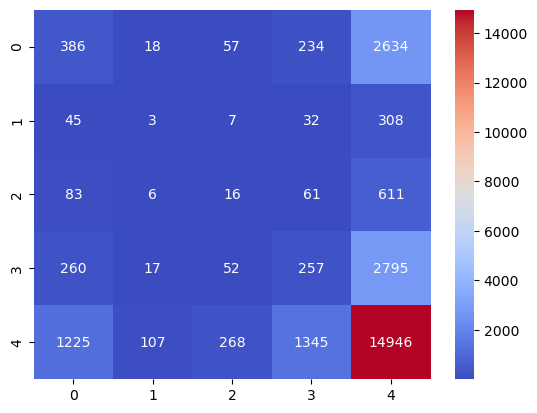

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True, fmt=".0f", cmap="coolwarm")

#### By using randomforest classifier got 61% accuracy better than 2nd method and lower than 1st method
#### as per my findings Logistic regression is the best method for this datas to train and predict decisions

In [31]:
df1['Manager'].value_counts()

John Smith         25261
Michael Lee        17600
Jennifer Nguyen    15897
Emily Chen         14062
William Kim         8568
Olivia Tan          4519
Name: Manager, dtype: int64

In [32]:
v=df1.groupby(['Manager','CSAT Score' ]).size()
v

Manager          CSAT Score
Emily Chen       1              1435
                 2               160
                 3               364
                 4              1783
                 5             10320
Jennifer Nguyen  1              2342
                 2               257
                 3               514
                 4              2209
                 5             10575
John Smith       1              3192
                 2               364
                 3               702
                 4              3159
                 5             17844
Michael Lee      1              2240
                 2               269
                 3               526
                 4              2212
                 5             12353
Olivia Tan       1               710
                 2                68
                 3               151
                 4               666
                 5              2924
William Kim      1              1311
          

#### Also find that the manager named John Smith has got more 5 rating than others

In [33]:
df1[df1['category']=='Returns']['Manager'].value_counts()

John Smith         14074
Michael Lee         9311
Emily Chen          7715
Jennifer Nguyen     6934
William Kim         3862
Olivia Tan          2201
Name: Manager, dtype: int64

#### I analyzed the data to check the number of product returns handled by each manager. From this analysis, I found that manager Olivia Tan had the lowest number of product returns, while manager John Smith had the highest.